# Importing Libraries

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [12]:
# generating random samples using normal distribution
samples = np.random.normal(10,5,50)
print(samples)

[17.20148264 12.98396806 15.22212827  0.54428461 11.34944376  9.16837787
 16.91349517 11.14117878  6.38675825  4.08461429 13.03119063  9.02372211
 15.90285348 20.19985822  7.78465329  9.4899879   9.0388449   5.96941729
  6.2821958   9.35865609 13.19774369  8.65517148 16.40558744 14.35746762
 11.80531415 15.25761434  5.56493319 -1.74937796 13.74763713  8.59561023
  4.58652575  7.97700844 12.32140664 11.26767663  8.49900161 13.69827064
  4.82310067  5.32910012  9.17971733  5.25796835 24.36868853 14.43087021
  5.63689531  7.39322559 10.23383718  0.84294839  9.25537786  5.06243283
  2.68740674  7.67498229]


# Symbols used and their meaning


$\mu$ = observations mean<br>
$\sigma_0$ = prior standard deviation<br>
$\mu_0$ = prior mean<br>
$\sigma_1$ = posterior standard deviation<br>
$\mu_1$ = posterior mean<br>

In [13]:
mean_samples = samples.mean()

In [14]:
# this function finds the normal distribution probablity
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

# PDF of Prior

## Prior Distribution Function
$p(\theta) = \frac{1}{\sqrt{2\pi\sigma_0}}exp\Bigg\{ - \frac{(y_n - \mu_0)^2}{2(\sigma_0)^2} \Bigg\}$

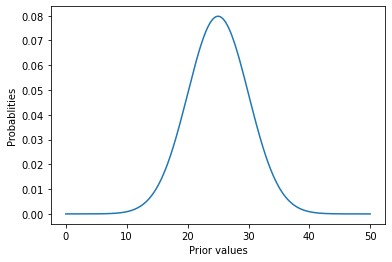

In [15]:
mean_prior = 25
sd_prior = 5
start = mean_prior - 5*sd_prior
end = mean_prior + 5*sd_prior
# generating random points in range [start, end]
X = np.random.uniform(start,end,1000)
X.sort()
Y_prior = []
for i in X:
    Y_prior.append(normpdf(i,mean_prior,sd_prior))
plt.plot(X,Y_prior)
plt.xlabel("Prior values")
plt.ylabel("Probablities")
plt.show()

# PDF of Posterior


## Posterior
$p(\theta) = \frac{1}{\sqrt{2\pi\sigma_1}}exp\Bigg\{ - \frac{(y_n - \mu_1)^2}{2(\sigma_1)^2} \Bigg\}\\$
$\sigma_0$ = 25<br>
$\mu_0$ = 5<br>
calculating mean and variance of posterior:<br>
$\sigma_1^2 = \Bigg( \frac{1}{\sigma_0^2} + \frac{1}{\sigma^2/N} \Bigg)^{-1}\\$
$ \mu_1 = \sigma_1^2\Bigg( \frac{\mu_0}{\sigma_0^2} + \frac{\bar{y}}{\sigma^2/N} \Bigg) \\$
on subtituting values we get, <br>
$\sigma_1^2$ = 0.49 <br>


In [16]:
def find_posterior_mean(sd_posterior, mean_prior, sd_prior, mean_samples, sd_samples, N):
    return (sd_posterior**2)*((mean_prior/sd_prior)+(mean_samples/((sd_samples**2)/N)))

In [17]:
mean_posterior = find_posterior_mean(0.7, mean_prior, sd_prior, mean_samples,5,50)
print("mean of posterior is",mean_posterior)

mean of posterior is 12.003848575369034


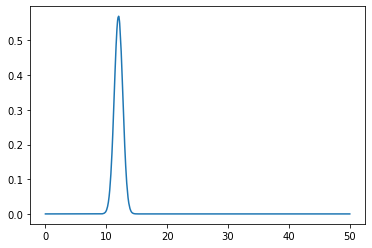

In [18]:
Y_posterior=[]
for i in X:
    Y_posterior.append(normpdf(i,mean_posterior,0.7))
plt.plot(X,Y_posterior)

# PDF of Likelihood

The n observations with variance $\sigma^2$ and mean $\bar{y}$ is equivalent to 1 observation $y_1 = \bar{y}$ with variance $\sigma^2/N$

 $\sigma^2/N = 25/50 \\
      \sigma^2/N = 0.5 $

$p(y_n/\theta) = \frac{1}{\sqrt{2\pi\sigma}}exp\Bigg\{ - \frac{(\bar{y_n} - \mu)^2}{2(\sigma)^2} \Bigg\}$

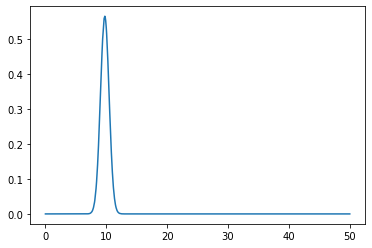

In [19]:
Y_likelihood=[]
for i in X:
    # value of sigma here is sqrt of 0.5 = 0.707
    Y_likelihood.append(normpdf(mean_samples,i,0.707))
plt.plot(X,Y_likelihood)

# Plotting all of them together

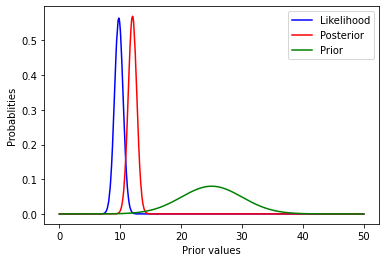

In [20]:
plt.plot(X,Y_likelihood,color='b',label='Likelihood')
plt.plot(X,Y_posterior,color='r',label='Posterior')
plt.plot(X,Y_prior,color='g',label='Prior')
plt.xlabel("Prior values")
plt.ylabel("Probablities")
plt.legend()
plt.show()